How the sales differnet by region?
what genre of games are paritcularly popular in a region?




# 1. Import Libraries & Load Dataset

In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [43]:
df = pd.read_csv('/Users/dooinnkim/jupyter_notebook/2023_data_portfolio/videogame/video_games.csv')

# 2. Overview of Data

In [44]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df.shape

(16719, 16)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [47]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [48]:
df_categorical = df.select_dtypes(include=['object'])

categorical_lst = list(df_categorical.columns[1:])

for col in categorical_lst:
    print(col, df_categorical[col].unique())

Platform ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Genre ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Publisher ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment' 'Square Enix'
 'Sony Computer Entertainment Europe' 'Virgin Interactive' 'LucasArts'
 'Warner Bros. Interactive Entertainment' 'Universal Interactive'
 'Eidos Interactive' 'RedOctane' 'Vivendi Games' 'Enix Corporation'
 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive' 'THQ'
 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' nan 'Codemasters' 'Majesco Entertainment'

In [49]:
null_percentage = df.isnull().mean() * 100

print(null_percentage)

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64


In [50]:
df.duplicated().sum()

0

### Data Review Comments

#### 1. Scaling 

- Conver **NA_Sales, EU_Sale, JP_Sales, Other_Sales, Global_Sales** to full representation in millions


#### 2. Data Types


- Convert **'User_Score'** data type from Object to float64.



#### 3. Missing Values


- **'Name'**: Few missing values (0.01%); consider dropping rows, or fill with a placeholder or via forward/backward fill.
- **'Year_of_Release'**: Moderate missing data (1.6%); consider filling with mode, median, or using interpolation.
- **'Genre' and 'Publisher'**: Few missing values; consider filling with mode or placeholder.
- **'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'**: Significant missing data (~40-50%); if crucial, consider sophisticated imputation methods or else, drop these columns.
- **'Developer' and 'Rating'**: Significant missing data (~40%); consider similar strategies as above, or treat 'Rating' missing data as 'Unrated'.

Dealing with missing values will be conducted after EDA

# 3. Data Cleaning

In [51]:
# Convert to full representation in millions
# sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
# df[sales_columns] = df[sales_columns] * 1000000

# Convert User_Socre from 'object' to 'float64'
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df['User_Score'] = df['User_Score'].fillna(0)
df['User_Score'] = df['User_Score'].astype(float)

In [52]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

## 4. EDA (Exploratory Data Analysis)

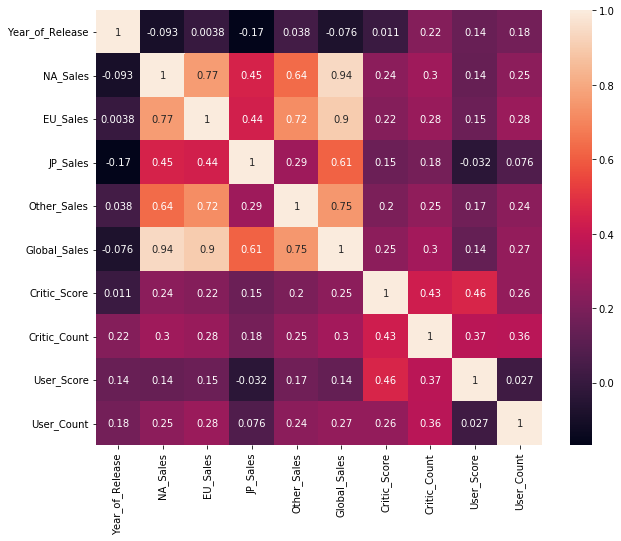

In [53]:
corr_matrix=df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

- **Year_of_Release** shows little to no correlation with sales in different regions and globally. It's slightly positively correlated with **Critic_Count** and **User_Score**, suggesting that more recent games might have more reviews and slightly higher user scores.

- **NA_Sales**, **EU_Sales**, **JP_Sales**, **Other_Sales** and **Global_Sales** show strong positive correlations with each other, which is expected as Global_Sales is a sum of all regional sales.

- **Critic_Score** and **User_Score** are moderately positively correlated, implying that critics and users tend to agree on the quality of a game. However, **User_Score** and **User_Count** show virtually no correlation, indicating that user scores don't necessarily depend on the number of users who scored a game.

- Both **Critic_Count** and **User_Count** show moderate positive correlation with sales in all regions and globally, suggesting that games with more reviews tend to have higher sales. This could be because more popular games (which would naturally have higher sales) attract more reviews, or because potential buyers are more likely to purchase a game that has been widely reviewed.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


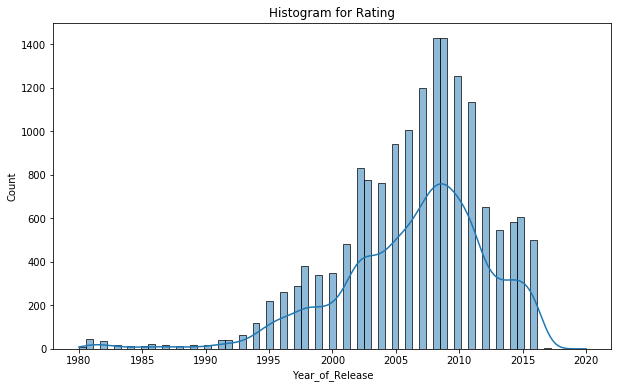

In [54]:

plt.figure(figsize=(10,6))
    
# Create histogram
sns.histplot(df['Year_of_Release'], kde=True)

# Add title
plt.title(f'Histogram for {col}')

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


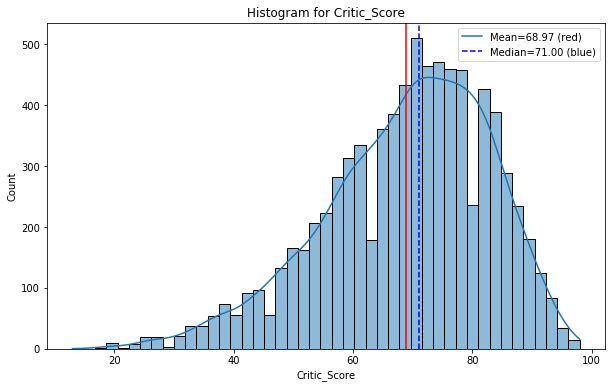

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


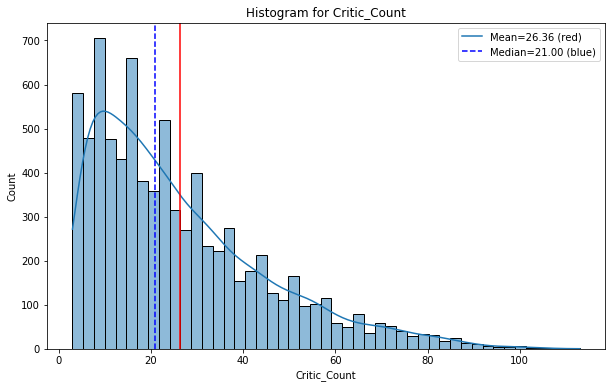

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


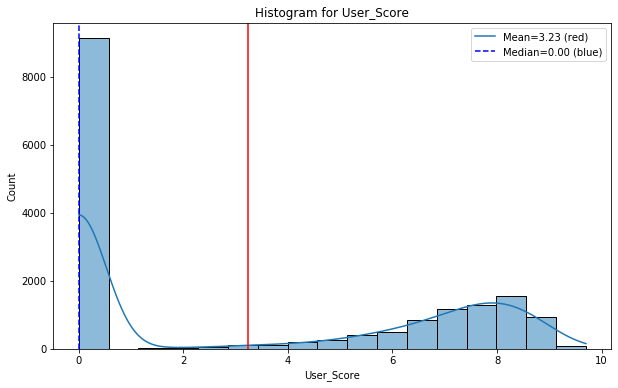

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


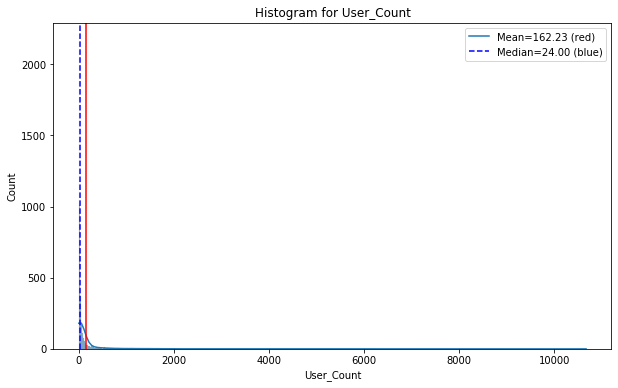

In [55]:
critic_user = ['Critic_Score','Critic_Count','User_Score','User_Count']
df_critic_user = df[critic_user]

for col in df_critic_user.columns:
    plt.figure(figsize=(10,6))
    
    # Create histogram
    sns.histplot(df_critic_user[col], kde=True)
    
    # Calculate mean and median
    mean_value = df_critic_user[col].mean()
    median_value = df_critic_user[col].median()

    # Add vertical lines for mean and median
    plt.axvline(median_value, color='b', linestyle='--')
    plt.axvline(mean_value, color='r', linestyle='-')

    # Add legend
    plt.legend({f'Mean={mean_value:.2f} (red)':mean_value, f'Median={median_value:.2f} (blue)':median_value})

    # Add title
    plt.title(f'Histogram for {col}')

    plt.show()

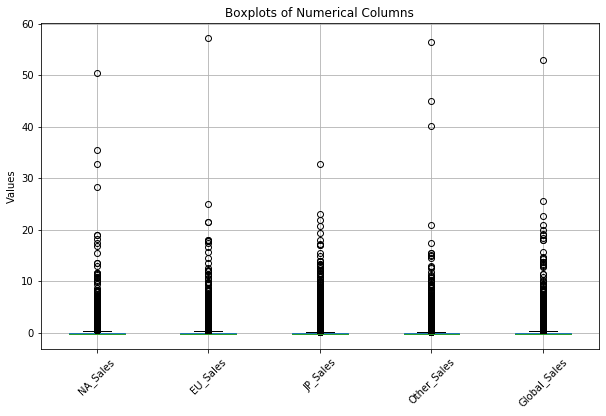

In [56]:
scaler = StandardScaler()

sales = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
df_sales = df[sales]

# Apply Z-score normalization to the DataFrame
df_sales_normalizaed = pd.DataFrame(scaler.fit_transform(df_sales), columns=df_sales.columns)

df_sales_normalizaed.boxplot(figsize=(10, 6))

# Set titles and labels
plt.title("Boxplots of Numerical Columns")
plt.ylabel("Values")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [57]:
outliers_dict = {}
for col in df_sales.columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df_sales[col].quantile(0.25)
    Q3 = df_sales[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers
    outliers = df_sales[(df_sales[col] < (Q1 - 1.5 * IQR)) | (df_sales[col] > (Q3 + 1.5 * IQR))][col]

    # Count number of outliers and calculate percentage
    n_outliers = len(outliers)
    percentage = (n_outliers / len(df_sales)) * 100

    # Add to dictionary
    outliers_dict[col] = {'count': n_outliers, 'percentage': percentage}

# Print the number and percentage of outliers for each column
for col, outlier_info in outliers_dict.items():
    print(f'{col}: {outlier_info["count"]} outliers ({outlier_info["percentage"]:.2f}%)')

NA_Sales: 1687 outliers (10.09%)
EU_Sales: 2061 outliers (12.33%)
JP_Sales: 2434 outliers (14.56%)
Other_Sales: 2243 outliers (13.42%)
Global_Sales: 1892 outliers (11.32%)


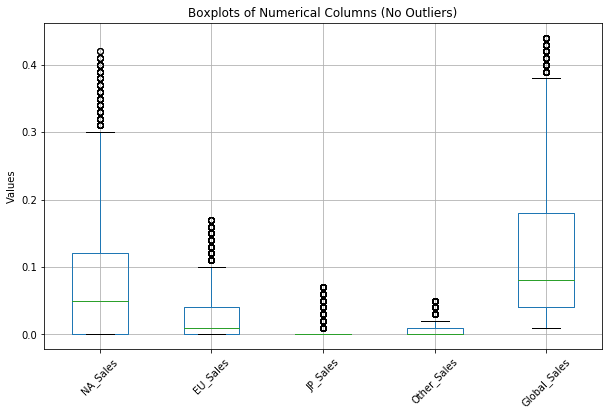

In [58]:
# First, create a copy of the DataFrame
df_sales_no_outliers = df_sales.copy()

# Detect and remove outliers for each column
for col in df_sales.columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df_sales_no_outliers[col].quantile(0.25)
    Q3 = df_sales_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1

    # Only keep rows in the DataFrame that do not contain outliers
    df_sales_no_outliers = df_sales_no_outliers[~((df_sales_no_outliers[col] < (Q1 - 1.5 * IQR)) | (df_sales_no_outliers[col] > (Q3 + 1.5 * IQR)))]
    

# Create boxplots
df_sales_no_outliers.boxplot(figsize=(10, 6))

# Set titles and labels
plt.title("Boxplots of Numerical Columns (No Outliers)")
plt.ylabel("Values")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()



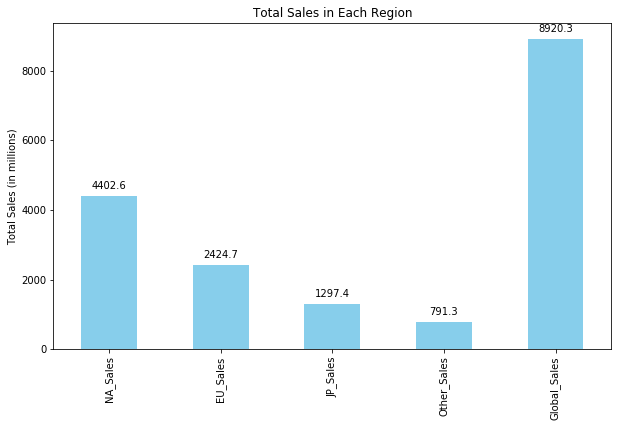

In [59]:
# Calculate total sales for each region
total_sales = df[sales].sum()

# Create bar plot
ax = total_sales.plot(kind='bar', figsize=(10,6), color='skyblue')

# Add a title
plt.title('Total Sales in Each Region')

# Add a label for the y-axis
plt.ylabel('Total Sales (in millions)')

# Show the values on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Show the plot
plt.show()


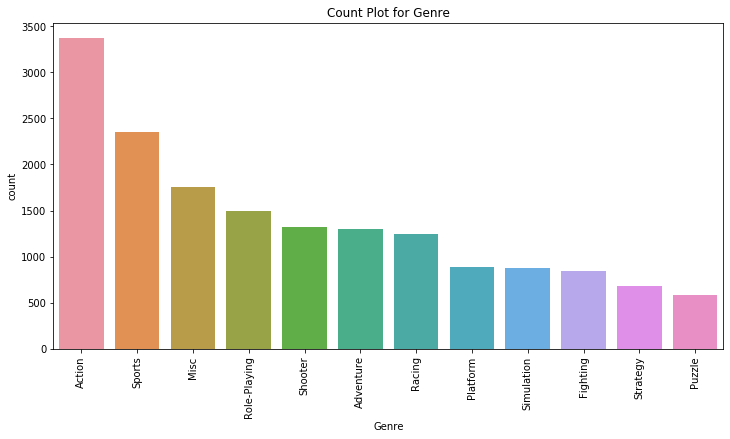

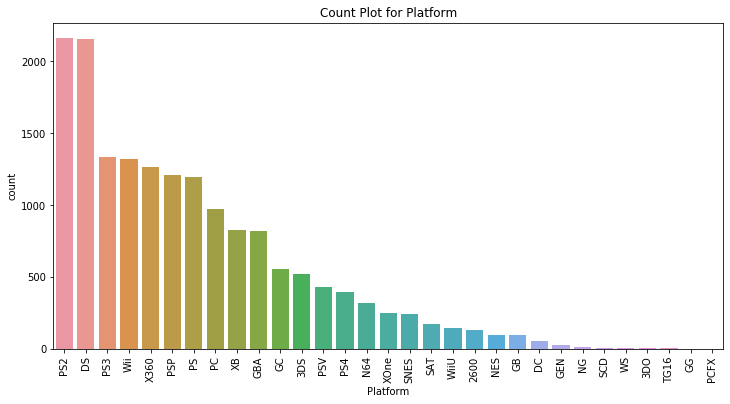

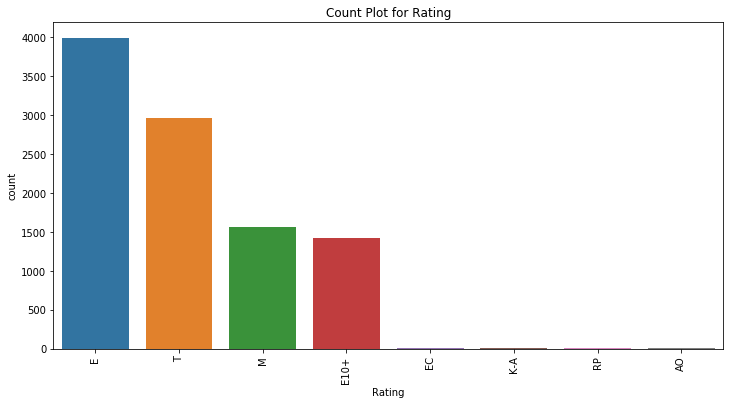

In [60]:
categorical_features = ['Genre', 'Platform', 'Rating']

for feature in categorical_features:
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, x=feature, order = df[feature].value_counts().index)
    plt.title(f'Count Plot for {feature}')
    plt.xticks(rotation=90)
    plt.show()


In [61]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

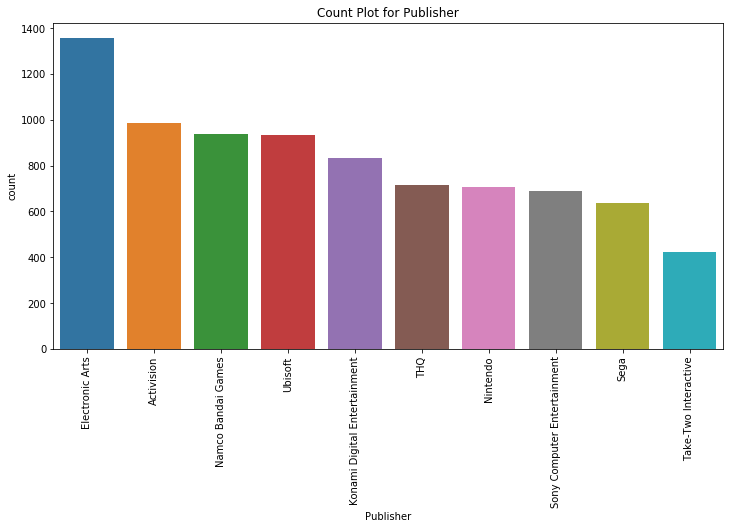

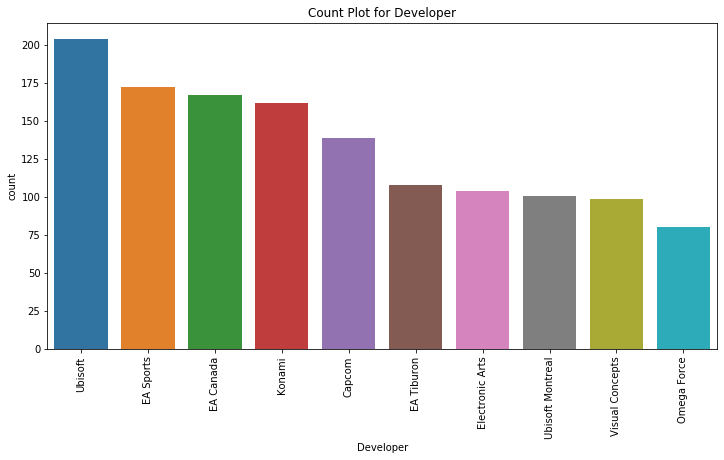

In [62]:
# Top 10 Publisher & Developer
categorical_features = ['Publisher', 'Developer']

for feature in categorical_features:
    plt.figure(figsize=(12,6))
    
    # Get top 10 most frequent categories
    top_10 = df[feature].value_counts().index[:10]
    
    # Only keep rows where feature is in top 10
    top_10_data = df[df[feature].isin(top_10)]
    
    # Create count plot
    sns.countplot(data=top_10_data, x=feature, order=top_10)
    
    plt.title(f'Count Plot for {feature}')
    plt.xticks(rotation=90)
    plt.show()


In [63]:
list(df.columns)

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Developer',
 'Rating']

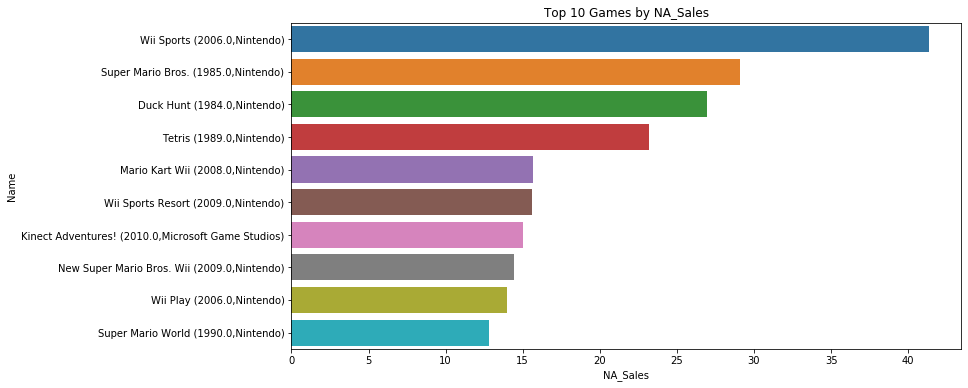

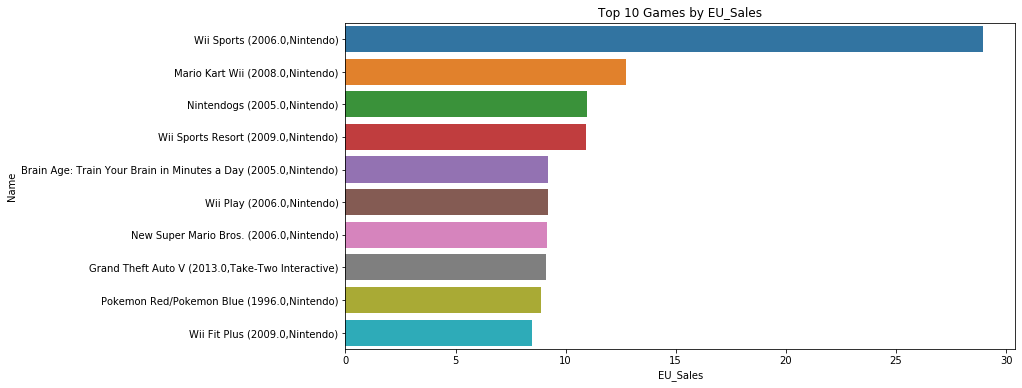

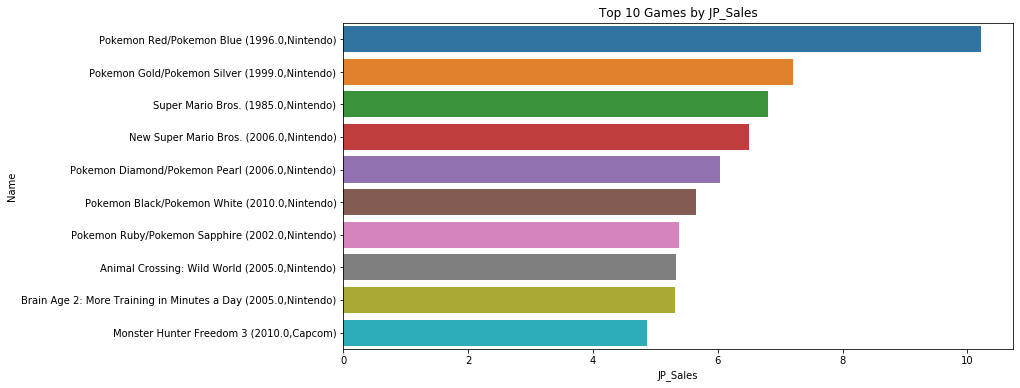

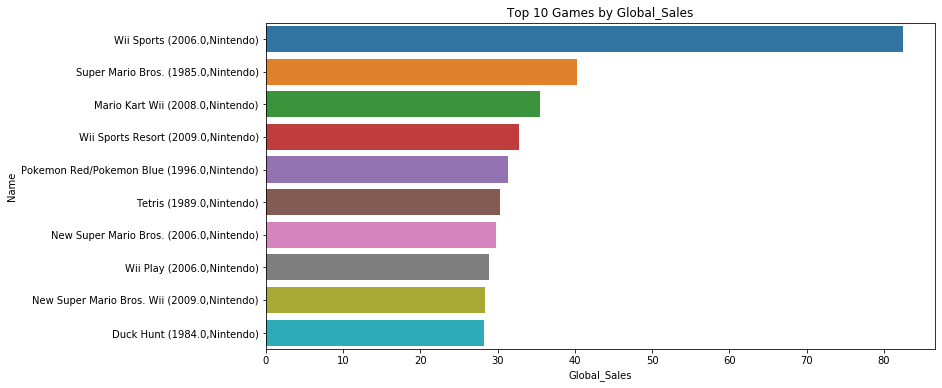

In [64]:
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

for sales in sales_columns:
    top_10_games = df.sort_values(by=sales, ascending=False).head(10)
    top_10_games['Name'] = top_10_games['Name'] + ' (' + top_10_games['Year_of_Release'].astype(str) + ',' + top_10_games['Publisher'] + ')'

    plt.figure(figsize=(12, 6))
    sns.barplot(x=sales, y='Name', data=top_10_games, orient='h')
    plt.title(f'Top 10 Games by {sales}')
    plt.show()


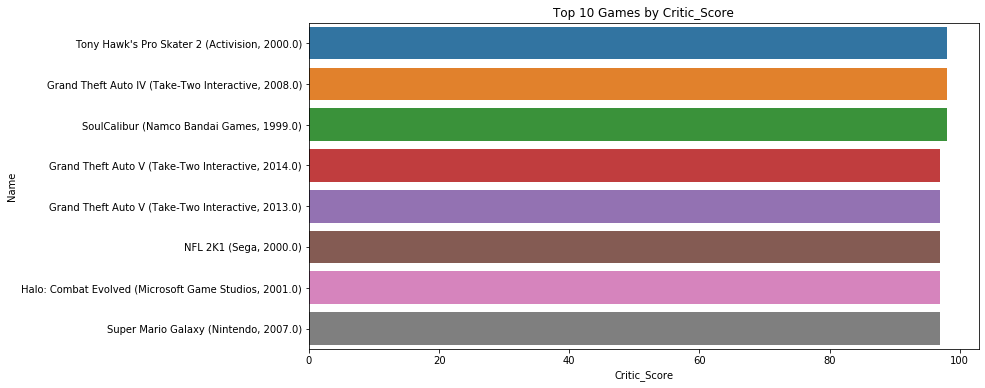

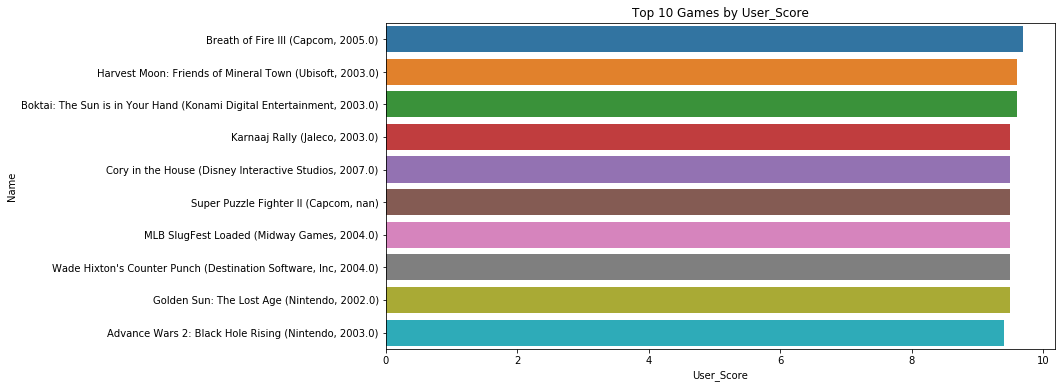

In [65]:
score_columns = ['Critic_Score','User_Score']

for score in score_columns:
    top_10_games = df.sort_values(by=score, ascending=False).head(10)
    top_10_games['Name'] = top_10_games['Name'] + ' (' + top_10_games['Publisher'] + ', ' + top_10_games['Year_of_Release'].astype(str) + ')'

    plt.figure(figsize=(12, 6))
    sns.barplot(x=score, y='Name', data=top_10_games, orient='h')
    plt.title(f'Top 10 Games by {score}')
    plt.show()


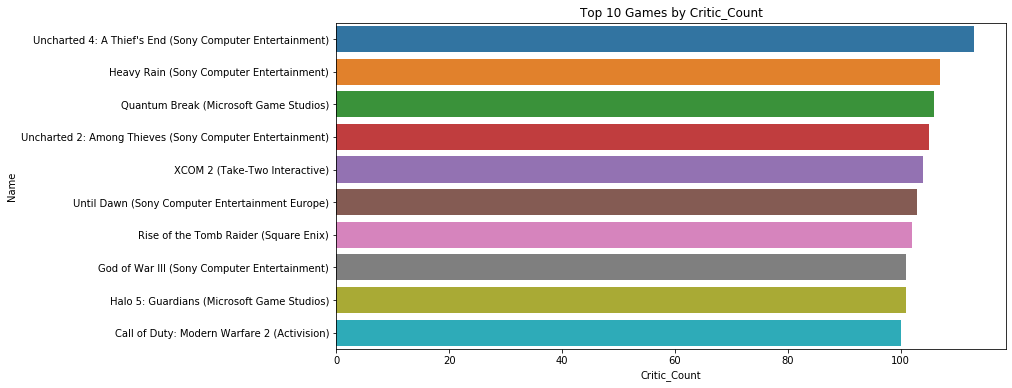

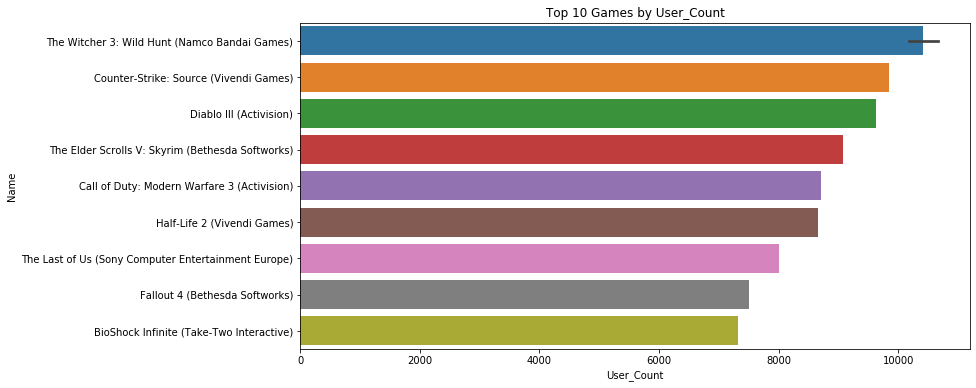

In [66]:
count_columns = ['Critic_Count','User_Count']

for count in count_columns:
    top_10_games = df.sort_values(by=count, ascending=False).head(10)
    top_10_games['Name'] = top_10_games['Name'] + ' (' + top_10_games['Publisher'] + ')'

    plt.figure(figsize=(12, 6))
    sns.barplot(x=count, y='Name', data=top_10_games, orient='h')
    plt.title(f'Top 10 Games by {count}')
    plt.show()

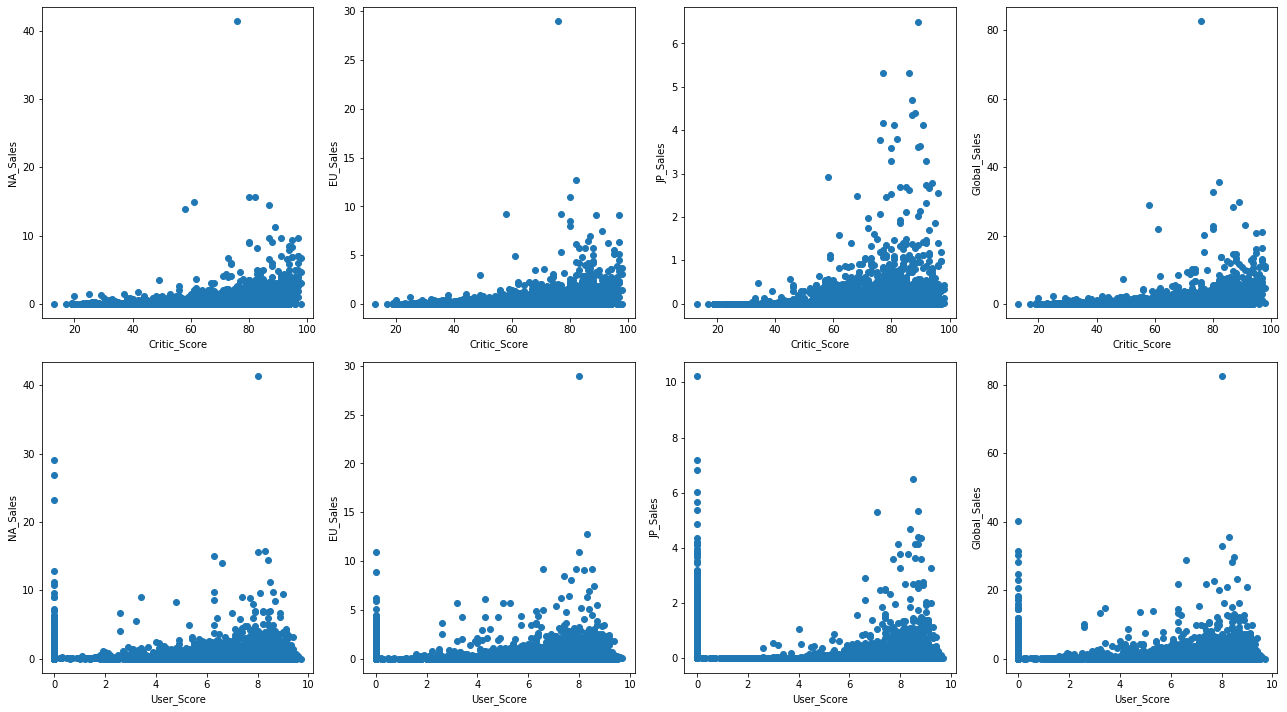

In [71]:
# Set up the figure and axes for the 2x4 grid of plots
fig, axs = plt.subplots(len(score_columns), len(sales_columns), figsize=(18, 10))

# Iterate over score and sales columns to create scatter plots
for i, score in enumerate(score_columns):
    for j, sale in enumerate(sales_columns):
        axs[i, j].scatter(df[score], df[sale])  # switch x and y axis in scatter plot
        axs[i, j].set_xlabel(score)  # x-axis label is score
        axs[i, j].set_ylabel(sale)  # y-axis label is sale

plt.tight_layout()
plt.show()


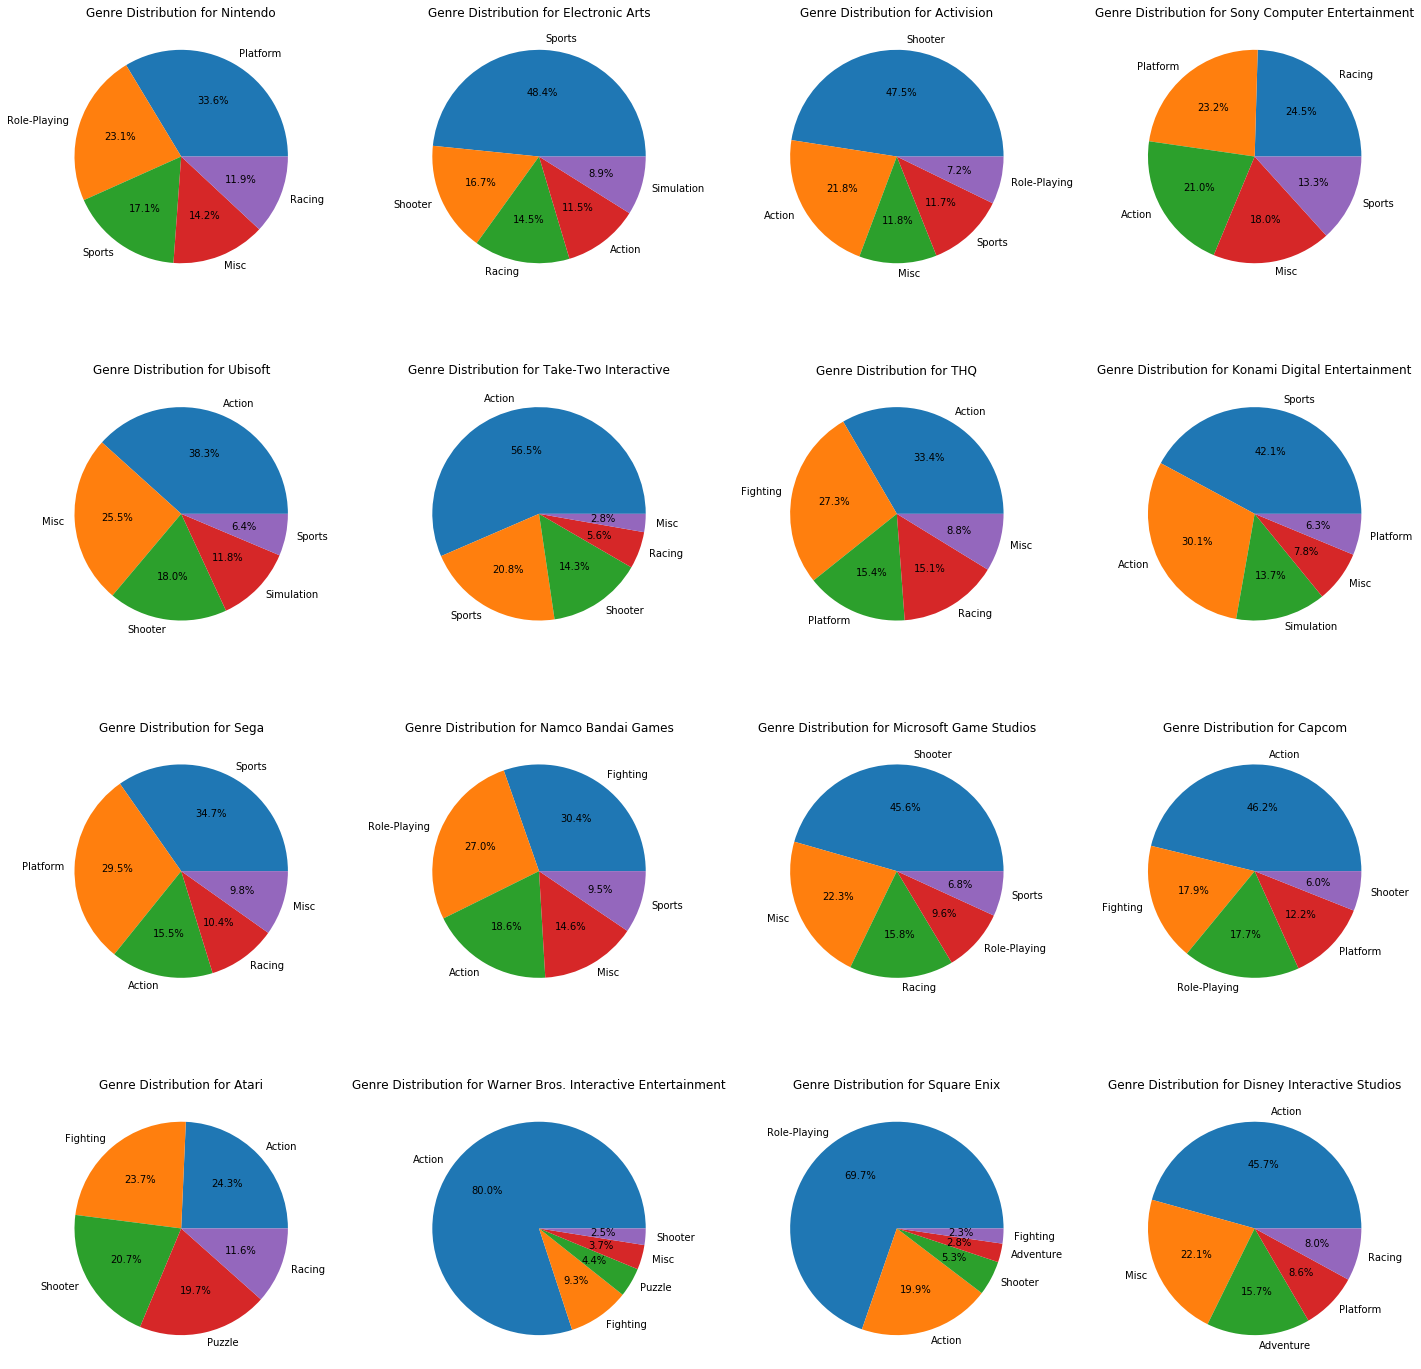

In [82]:


# Select top 10 publishers by Global_Sales
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().nlargest(16).index

# Create 4x4 grid
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
axs = np.ravel(axs)

for i, publisher in enumerate(top_publishers):
    # Select rows for this publisher
    publisher_data = df[df['Publisher'] == publisher]
    
    # Select top 5 genres by Global_Sales for this publisher
    top_genres = publisher_data.groupby('Genre')['Global_Sales'].sum().nlargest(5)
    
    # Create pie chart on subplot
    axs[i].pie(top_genres, labels=top_genres.index, autopct='%1.1f%%')
    axs[i].set_title(f'Genre Distribution for {publisher}')

# Remove unused subplots
for j in range(i+1, 16):
    fig.delaxes(axs[j])

# Show plot with tight layout
plt.tight_layout()
plt.show()


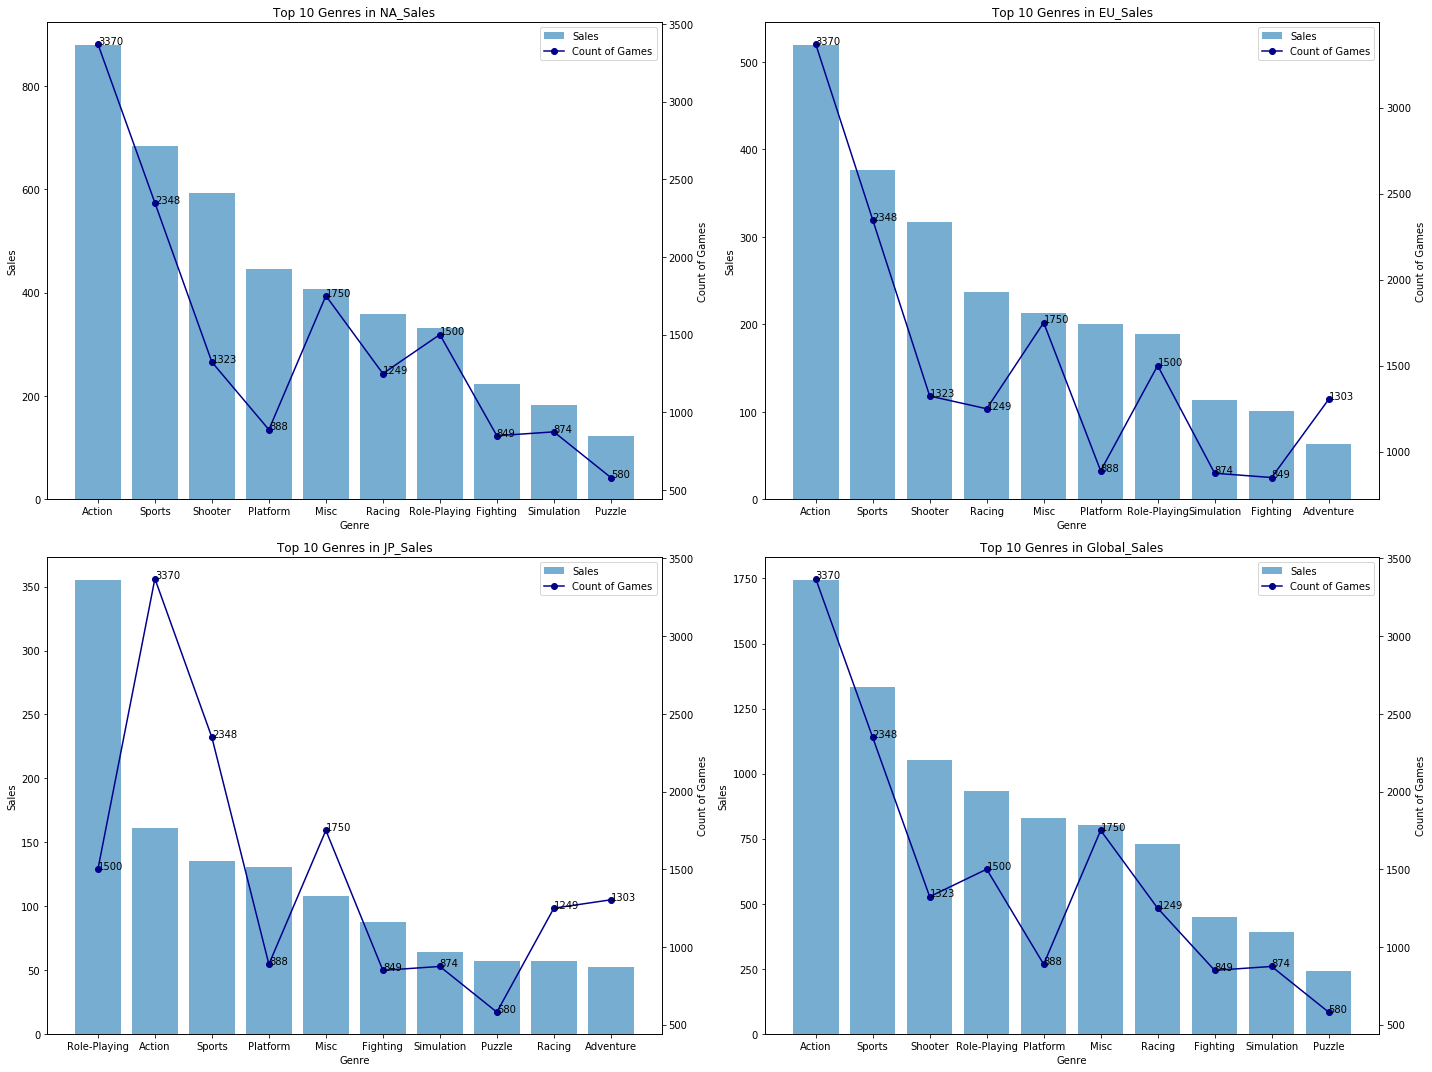

In [85]:
# Select sales regions
sales_regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

# Create a figure
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = np.ravel(axs)  # flatten the axes array

# Loop over each region
for i, region in enumerate(sales_regions):
    # Group by Genre and sum sales in the region, then select top 10
    top_genres_sales = df.groupby('Genre')[region].sum().nlargest(10)
    top_genres_count = df['Genre'].value_counts().loc[top_genres_sales.index]  # Count of games per genre

    # Create bar chart on subplot for sales
    axs[i].bar(top_genres_sales.index, top_genres_sales, label='Sales', alpha=0.6)
    
    # Create a twin Axes sharing the xaxis
    ax2 = axs[i].twinx()
    ax2.plot(top_genres_count.index, top_genres_count, color='darkblue', label='Count of Games', marker='o')

    # Annotate the count of games on the plot
    for j, txt in enumerate(top_genres_count):
        ax2.annotate(txt, (top_genres_count.index[j], top_genres_count[j]))

    # Set labels and title
    axs[i].set_title(f'Top 10 Genres in {region}')
    axs[i].set_xlabel('Genre')
    axs[i].set_ylabel('Sales')
    ax2.set_ylabel('Count of Games')

    # Add legend to the plot
    lines, labels = axs[i].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)

# Show plot with tight layout
plt.tight_layout()
plt.show()


In [87]:
# Initialize a DataFrame to store the cost-effectiveness for each genre in each region
cost_effectiveness = pd.DataFrame(columns=['Genre', 'Region', 'Cost_Effectiveness'])

# Loop over each region
for region in sales_regions:
    # Group by Genre and sum sales in the region
    sales_by_genre = df.groupby('Genre')[region].sum()

    # Count the number of games per genre
    count_by_genre = df['Genre'].value_counts()

    # Calculate cost-effectiveness as the ratio of sales to count
    ratio = sales_by_genre / count_by_genre

    # Remove the NaN values and sort in descending order
    ratio = ratio.dropna().sort_values(ascending=False)

    # Get the top 5 genres
    top_5_genres = ratio.head(5)

    # Add the information to the DataFrame
    for genre in top_5_genres.index:
        cost_effectiveness = cost_effectiveness.append({
            'Genre': genre,
            'Region': region,
            'Cost_Effectiveness': top_5_genres[genre]
        }, ignore_index=True)

# Display the DataFrame
print(cost_effectiveness)


           Genre        Region  Cost_Effectiveness
0       Platform      NA_Sales            0.501689
1        Shooter      NA_Sales            0.447649
2         Sports      NA_Sales            0.291495
3         Racing      NA_Sales            0.287710
4       Fighting      NA_Sales            0.263086
5        Shooter      EU_Sales            0.239864
6       Platform      EU_Sales            0.225619
7         Racing      EU_Sales            0.189359
8         Sports      EU_Sales            0.160473
9         Action      EU_Sales            0.154045
10  Role-Playing      JP_Sales            0.236973
11      Platform      JP_Sales            0.147331
12      Fighting      JP_Sales            0.103039
13        Puzzle      JP_Sales            0.098810
14    Simulation      JP_Sales            0.072998
15      Platform  Global_Sales            0.932523
16       Shooter  Global_Sales            0.795873
17  Role-Playing  Global_Sales            0.622933
18        Racing  Global_Sales 

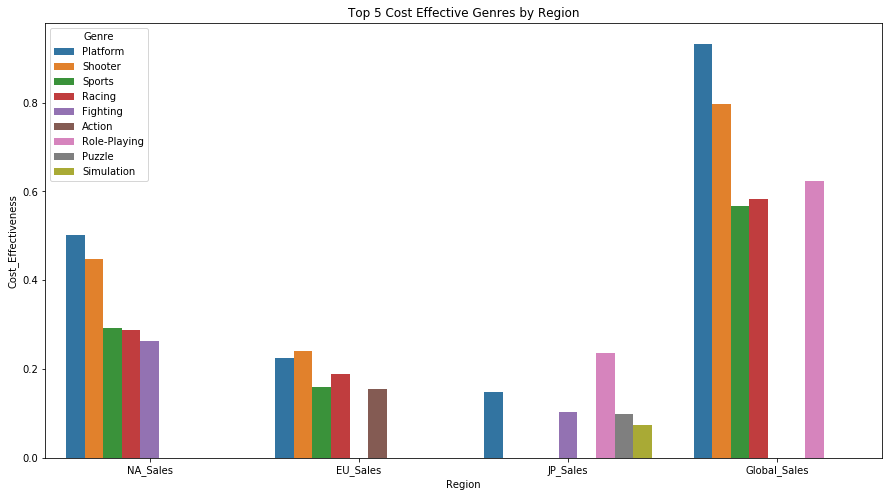

In [88]:
plt.figure(figsize=(15,8))
sns.barplot(x='Region', y='Cost_Effectiveness', hue='Genre', data=cost_effectiveness)
plt.title('Top 5 Cost Effective Genres by Region')
plt.show()

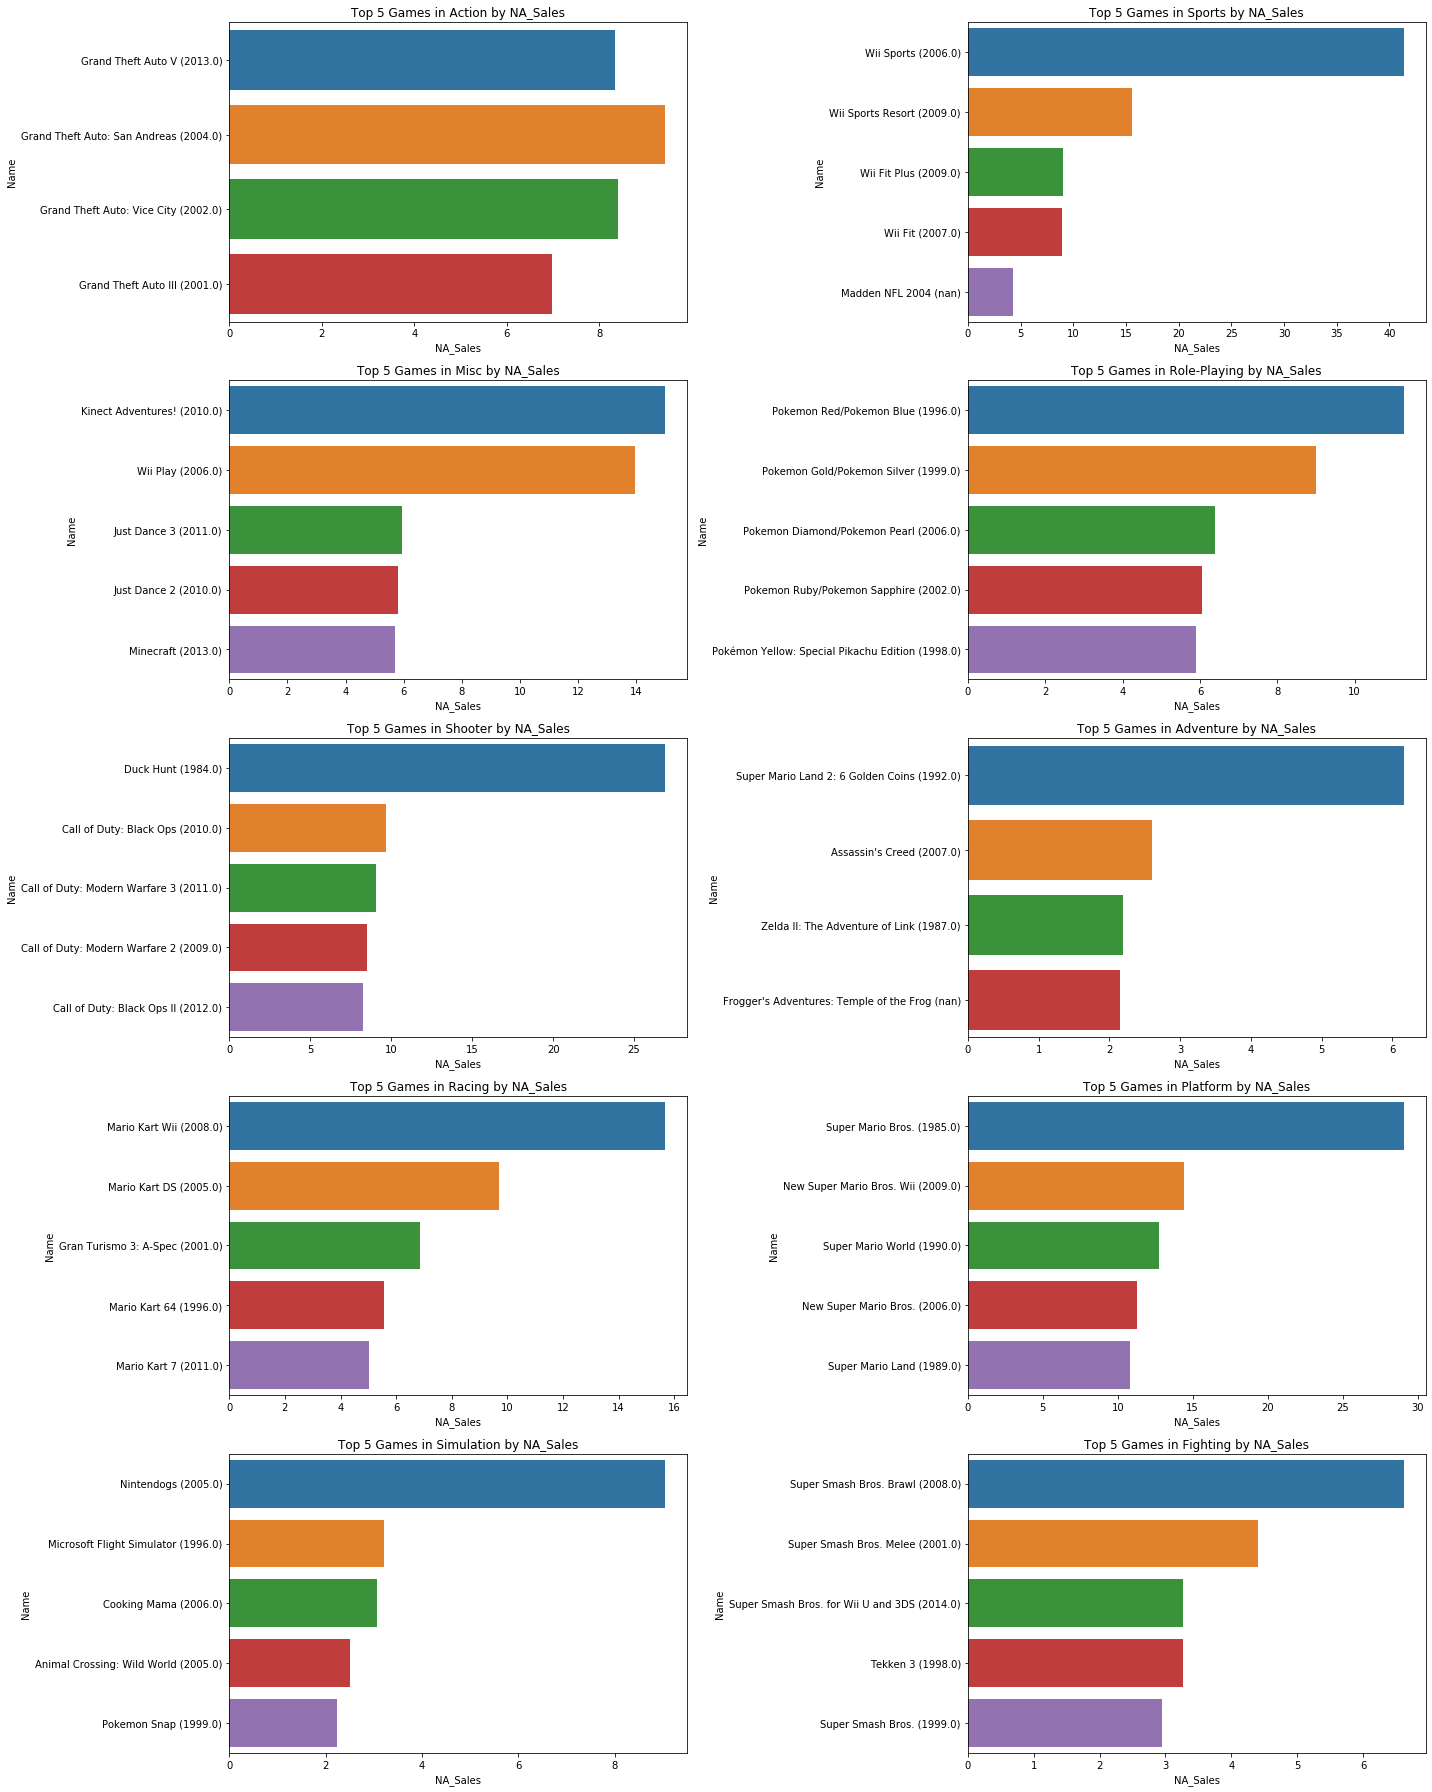

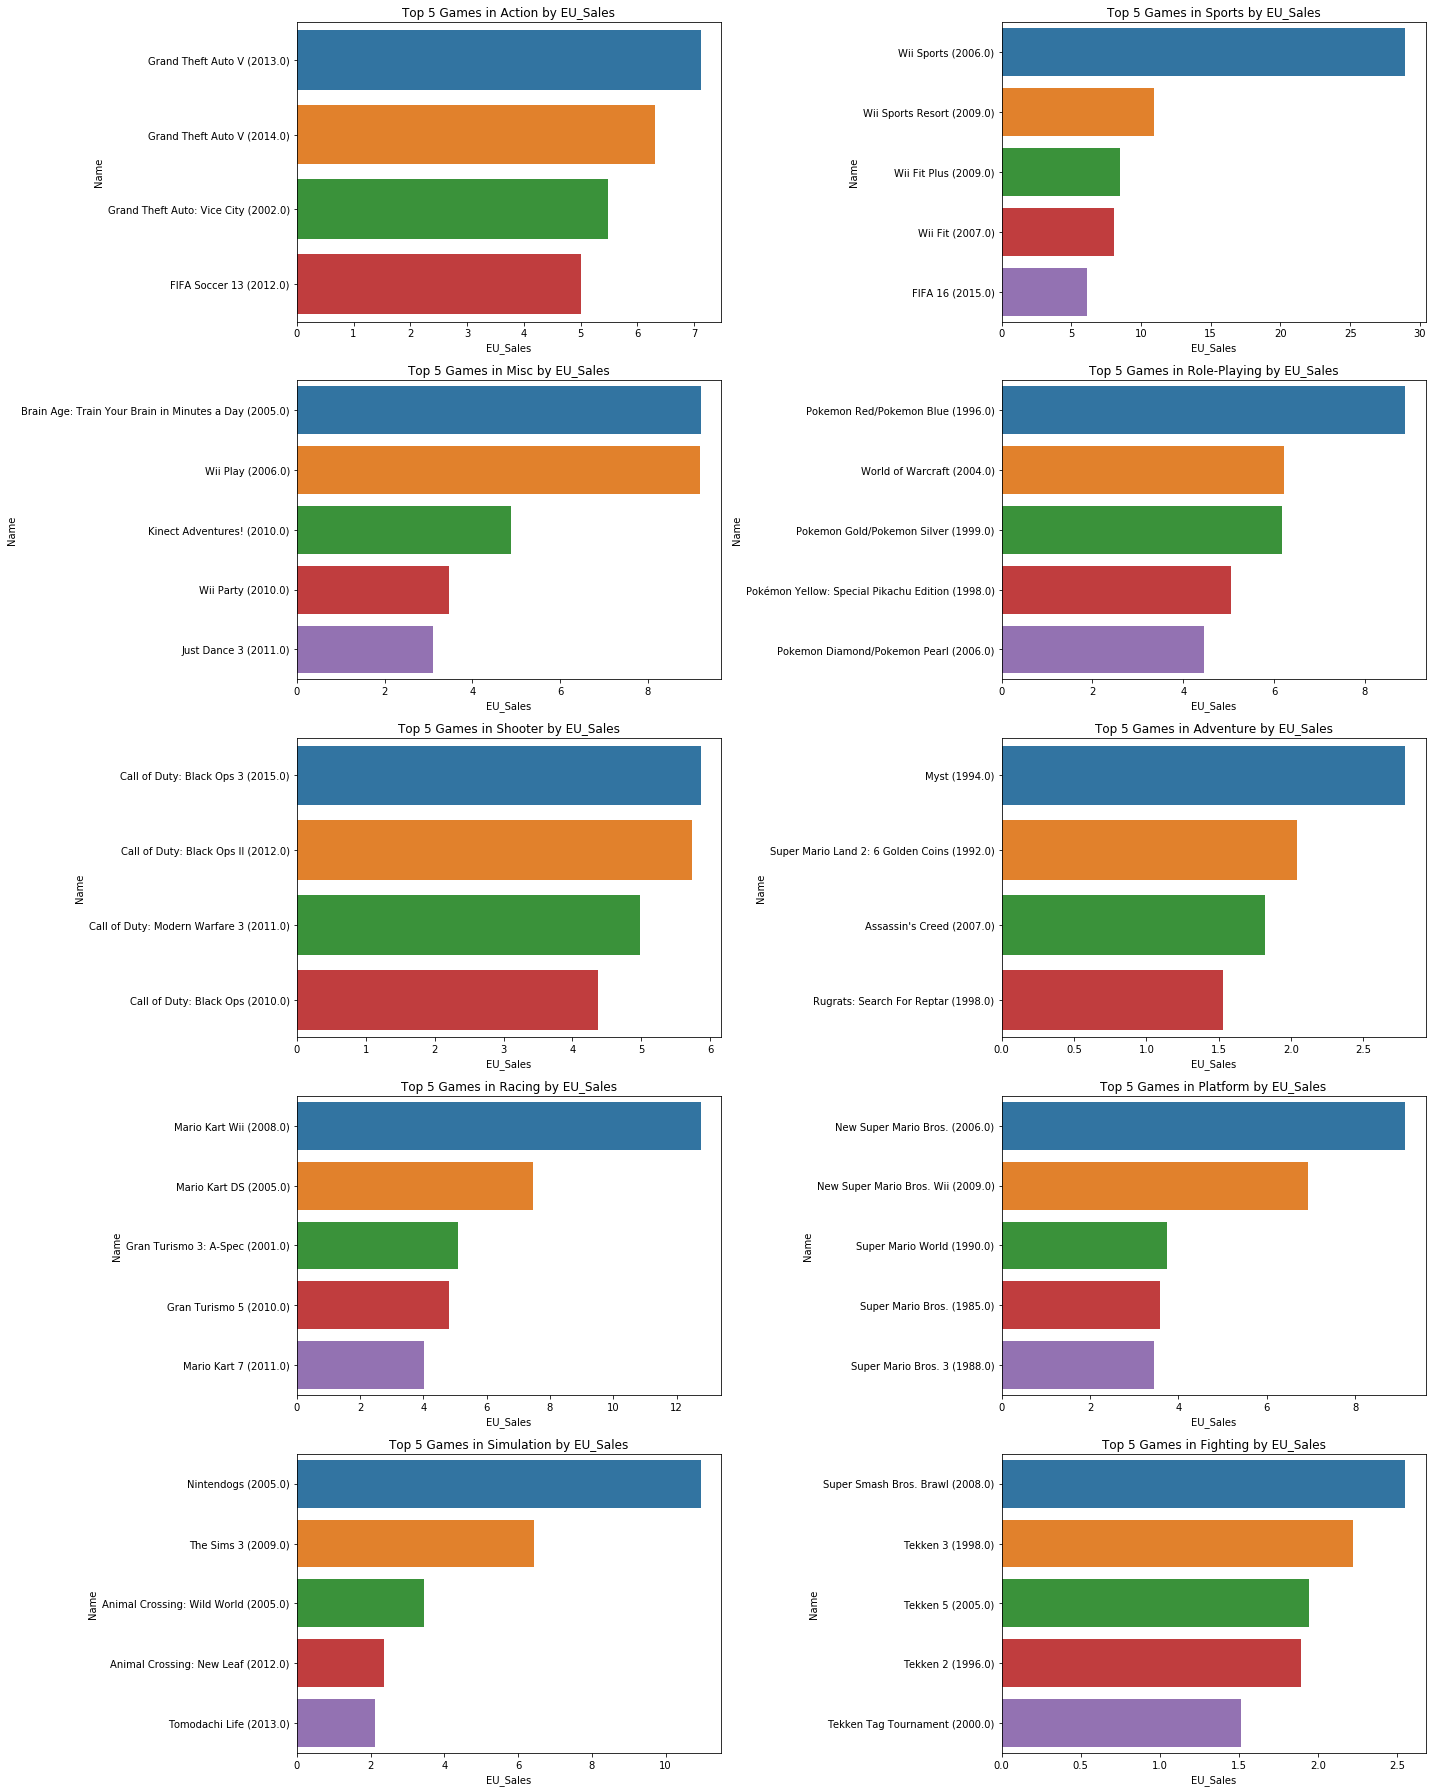

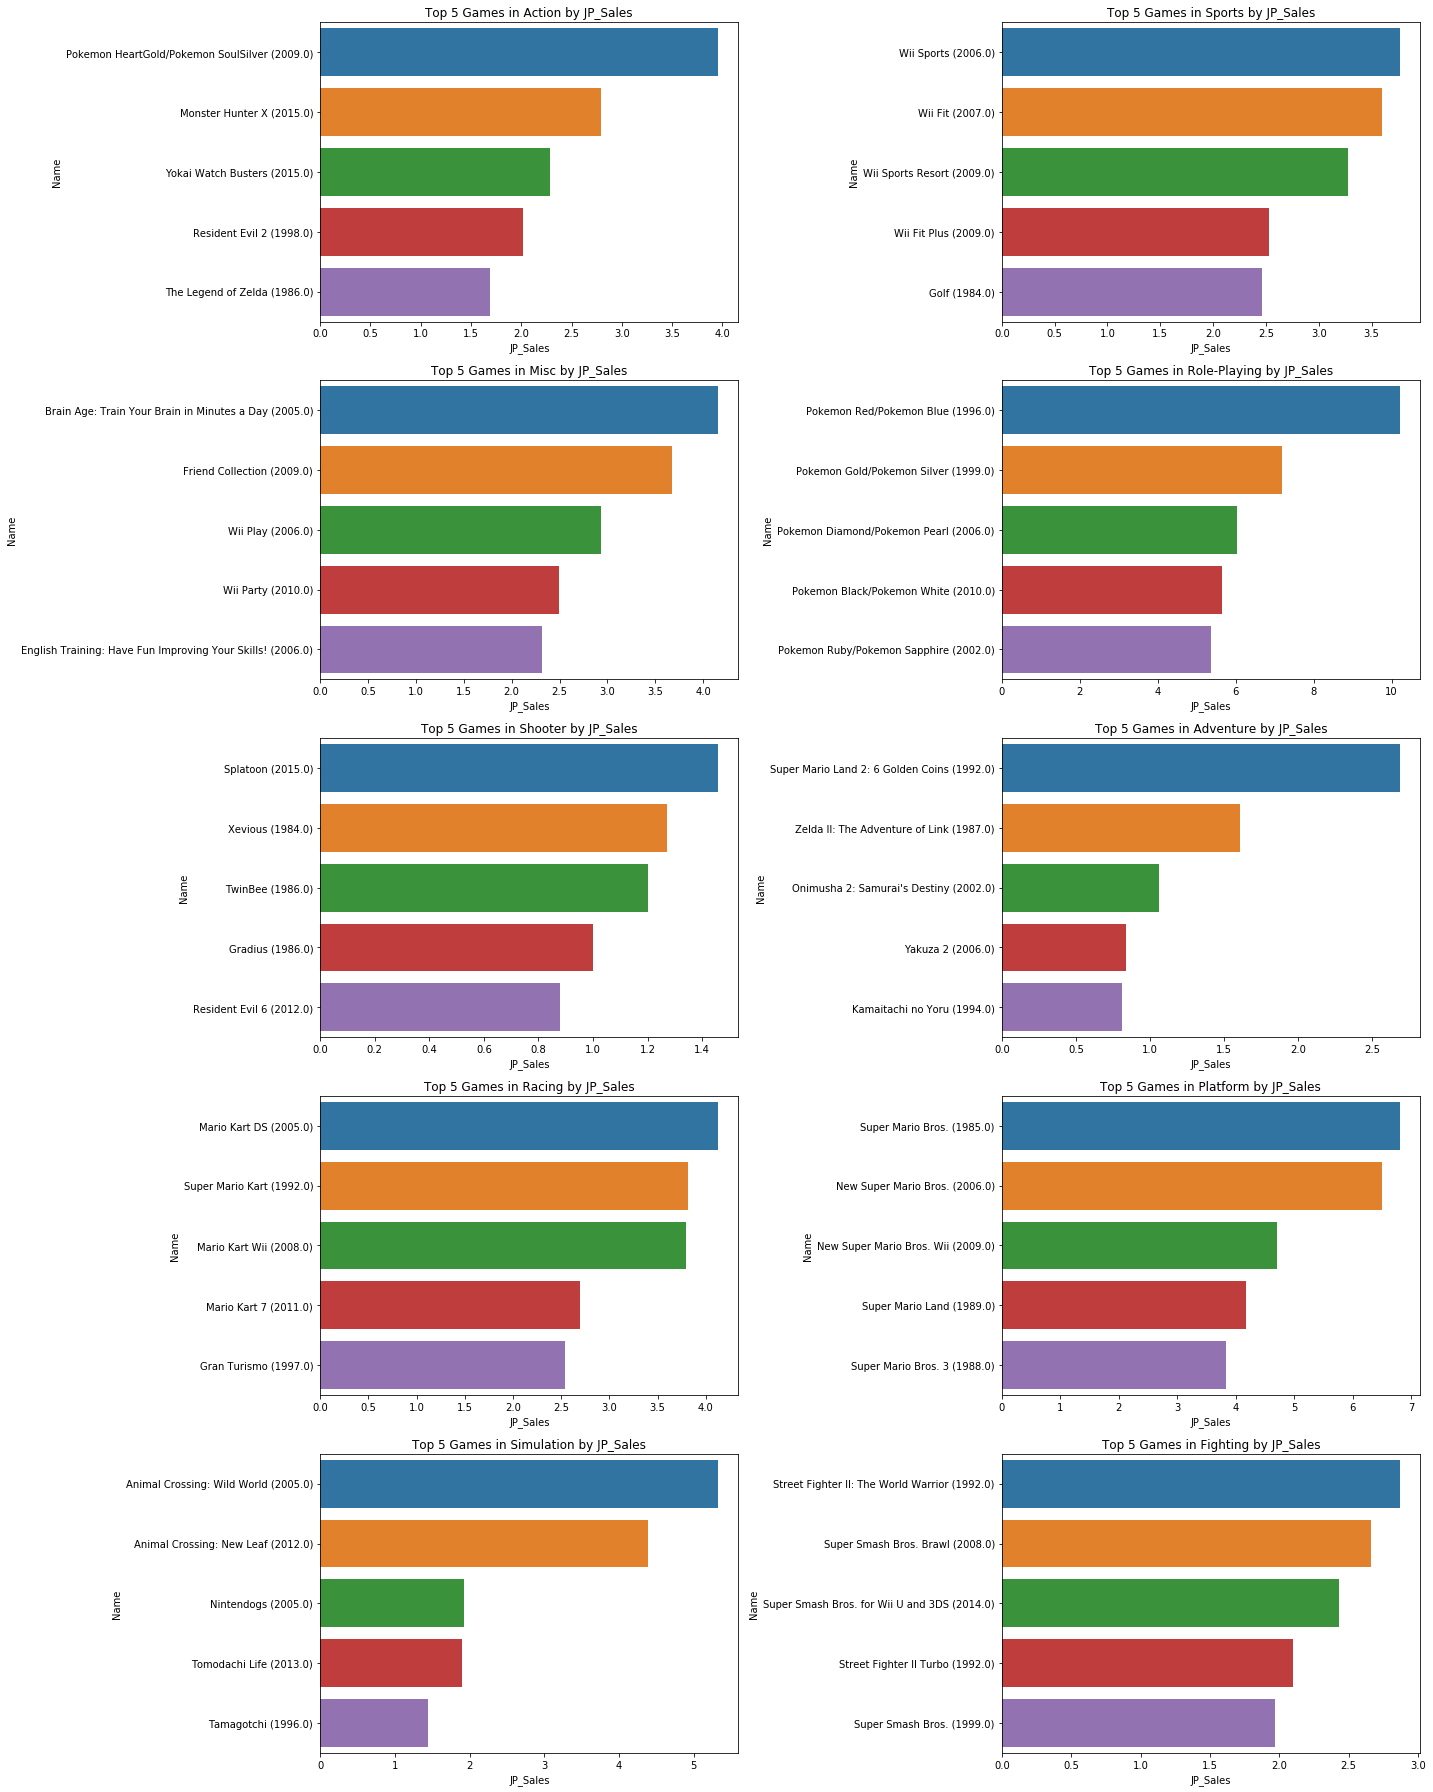

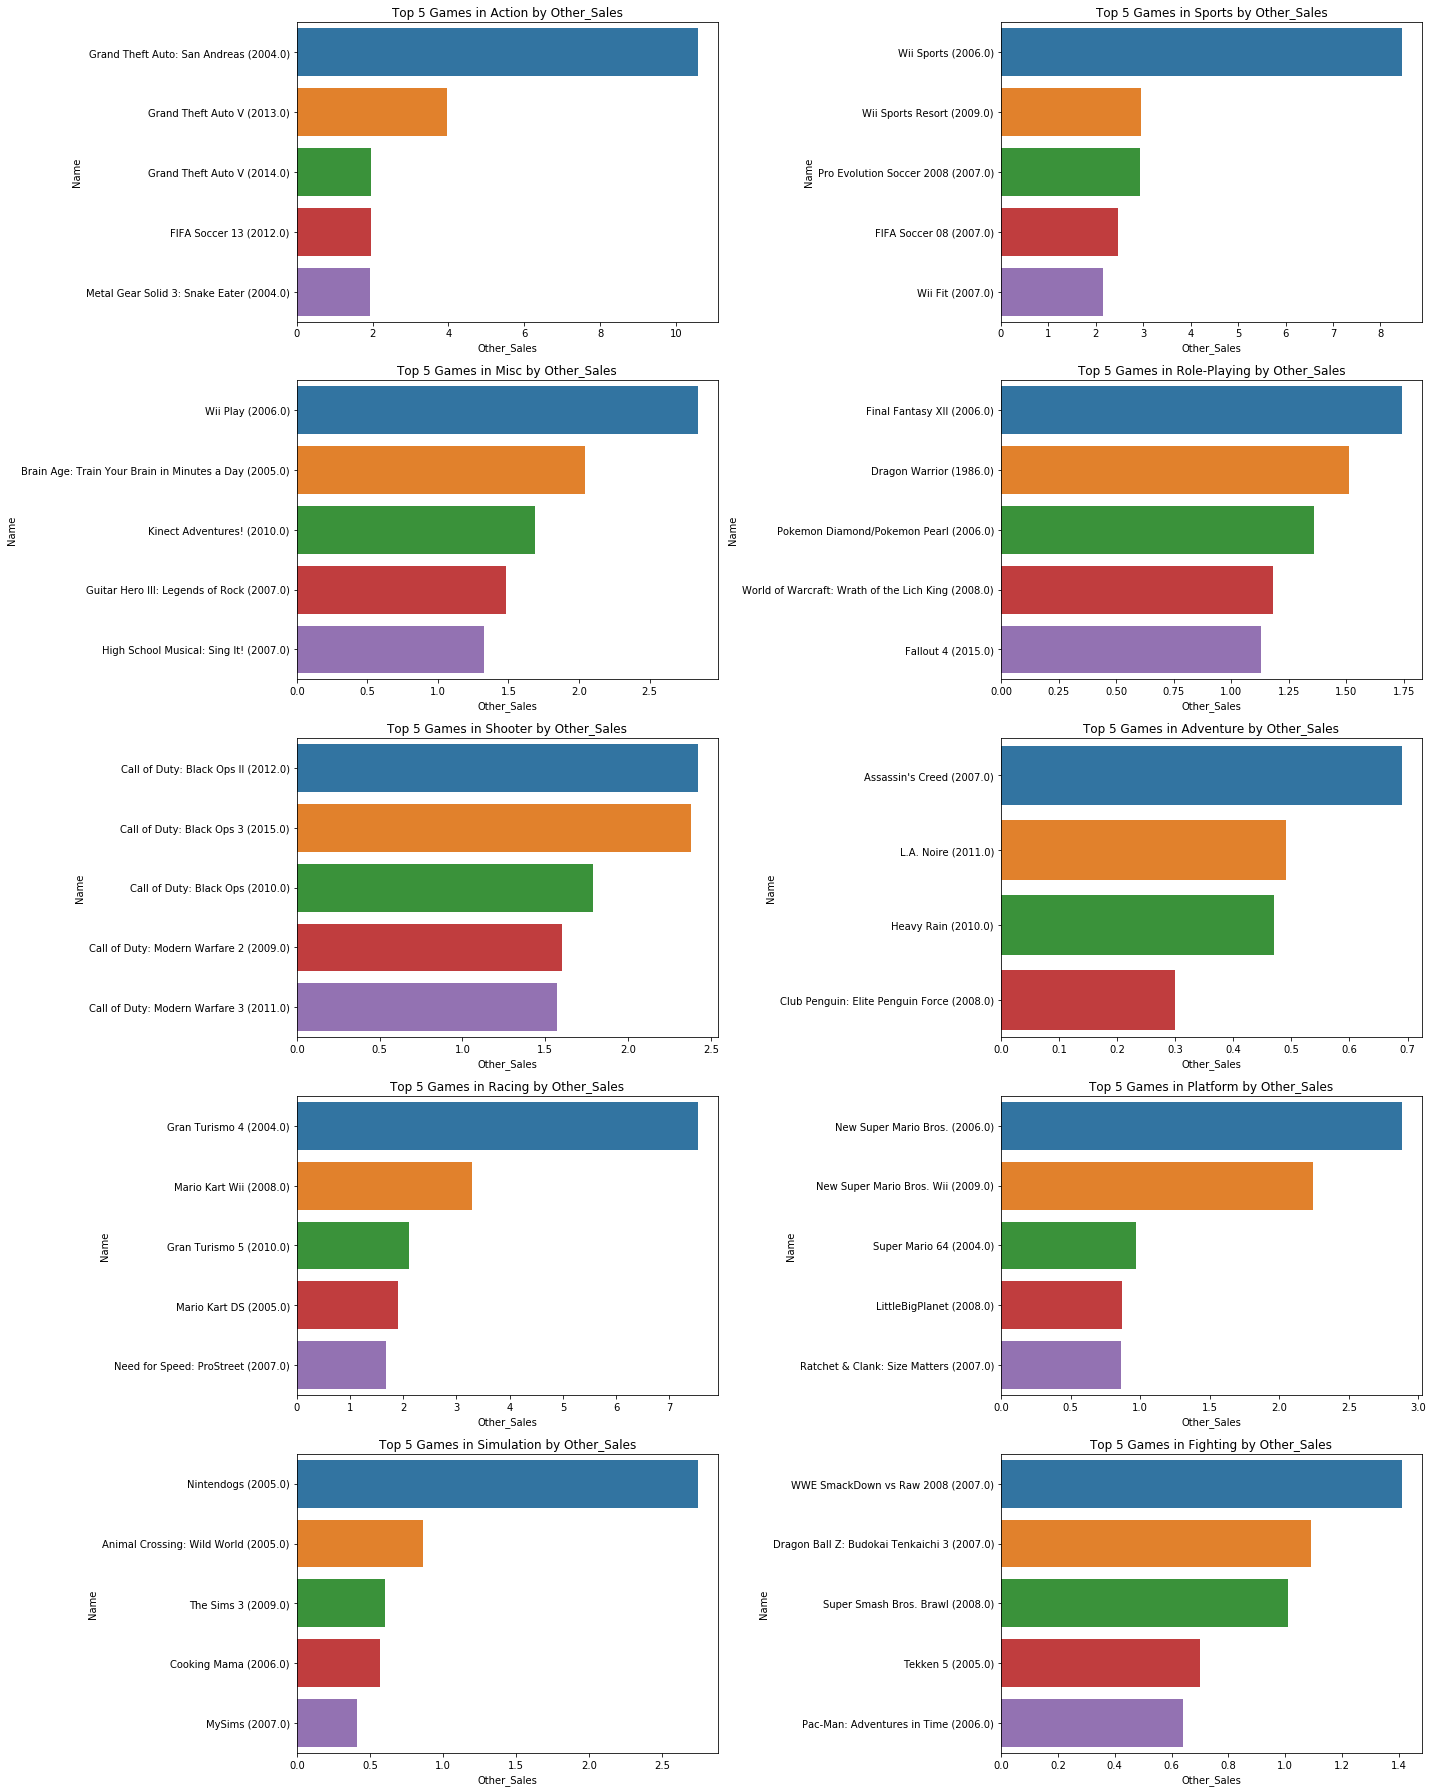

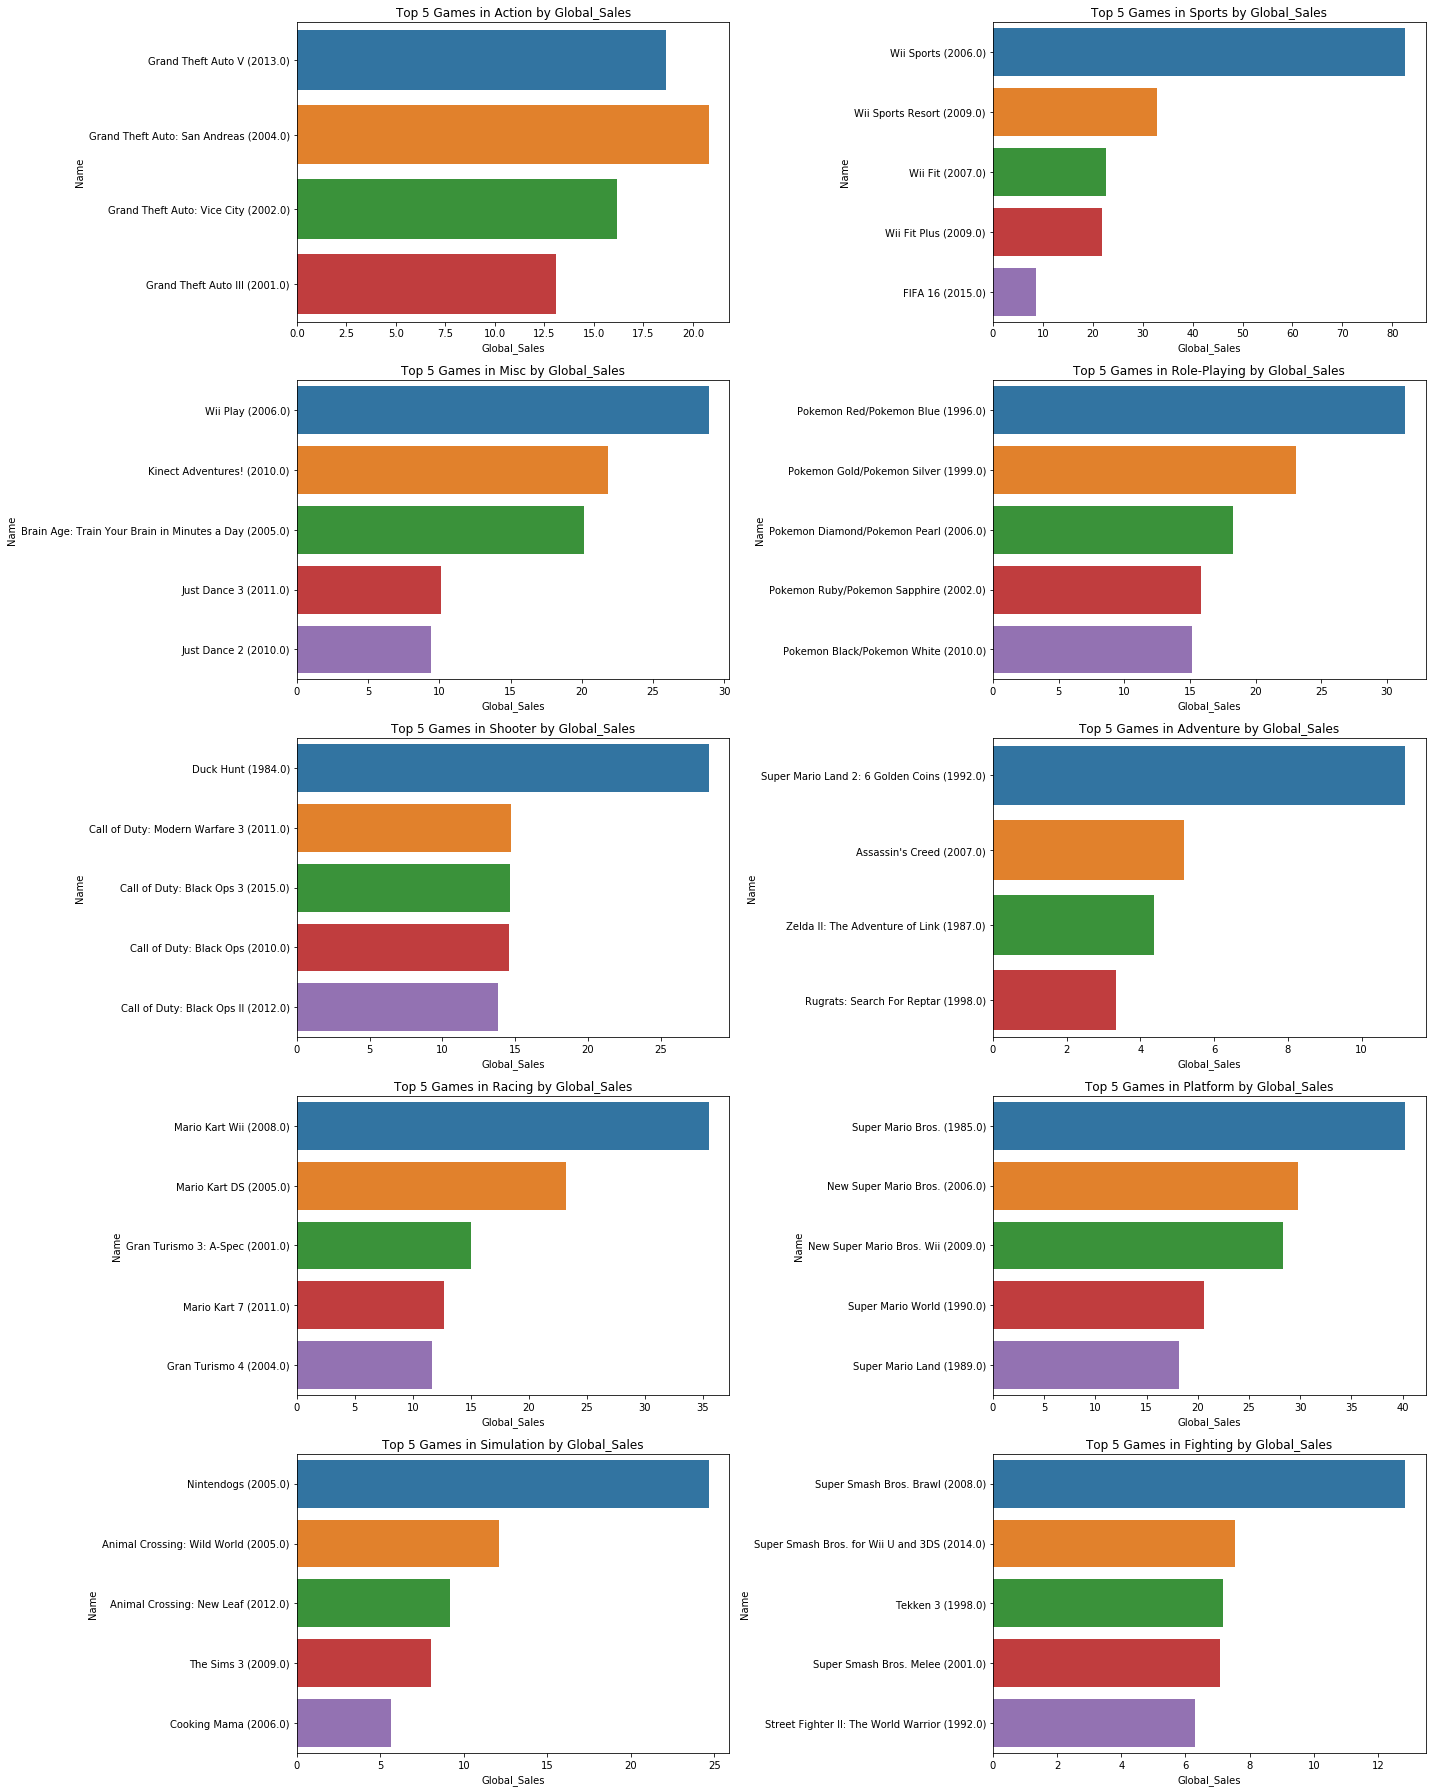

In [92]:
sales_regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Get top 10 genres with most games
genres = df['Genre'].value_counts().nlargest(10).index

for region in sales_regions:
    fig, axs = plt.subplots(5, 2, figsize=(20, 25))  # Adjusted for 10 genres
    axs = axs.ravel()  # make it a 1-d array

    for i, genre in enumerate(genres):
        top_5_games = df[df['Genre'] == genre].nlargest(5, region)
        top_5_games['Name'] = top_5_games['Name'] + ' (' + top_5_games['Year_of_Release'].astype(str) + ')'

        sns.barplot(x=region, y='Name', data=top_5_games, ax=axs[i], errorbar=None)
        axs[i].set_title(f'Top 5 Games in {genre} by {region}')

    plt.tight_layout()
    plt.show()


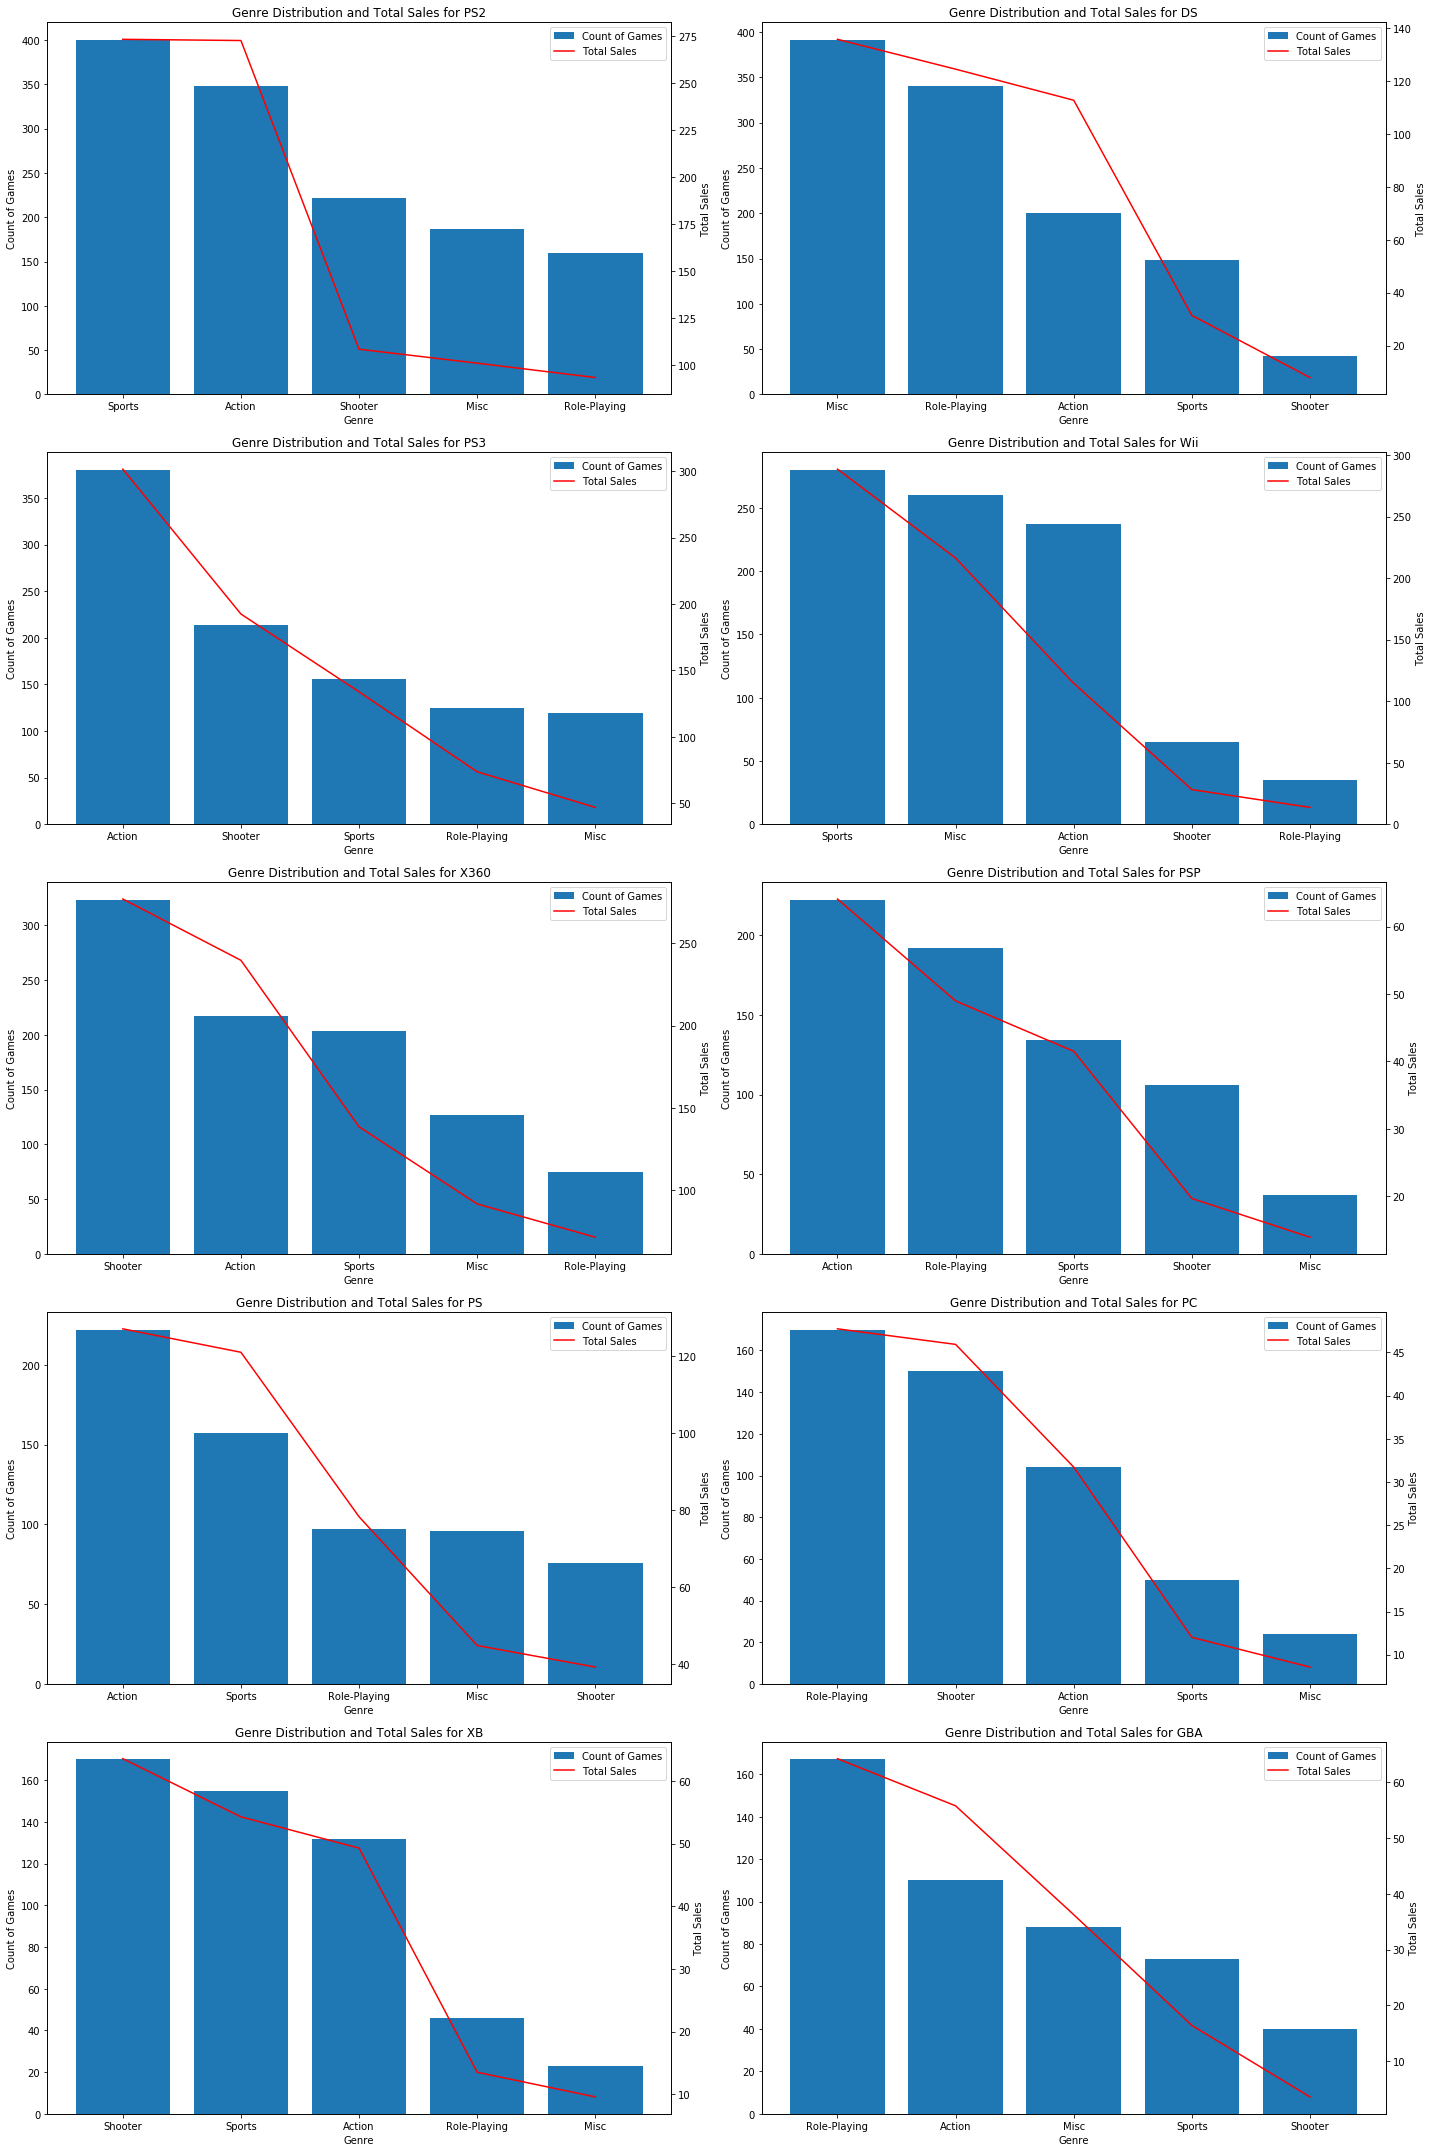

In [95]:
# First, find out the top 10 platforms and genres
top_platforms = df['Platform'].value_counts().nlargest(10).index
top_genres = df['Genre'].value_counts().nlargest(5).index

# Filter the data frame to include only these top platforms and genres
filtered_df = df[df['Platform'].isin(top_platforms) & df['Genre'].isin(top_genres)]

# Create a 5x2 grid of subplots
fig, axes = plt.subplots(5, 2, figsize=(20, 30))
axes = axes.ravel()  # Flatten the axes array

# For each platform, create a bar plot of the distribution of genres
# For each platform, create a bar plot of the distribution of genres and line plot of total sales
for i, platform in enumerate(top_platforms):
    data_count = filtered_df[filtered_df['Platform'] == platform]['Genre'].value_counts().nlargest(5)
    axes[i].bar(data_count.index, data_count.values, label='Count of Games')
    axes[i].set_ylabel('Count of Games')
    
    data_sales = filtered_df[filtered_df['Platform'] == platform].groupby('Genre')['Global_Sales'].sum().nlargest(5)
    axes2 = axes[i].twinx()  # Create a second y-axis
    axes2.plot(data_sales.index, data_sales.values, color='red', label='Total Sales')
    axes2.set_ylabel('Total Sales')
    
    axes[i].set_title(f'Genre Distribution and Total Sales for {platform}')
    axes[i].set_xlabel('Genre')

    # Display the legend
    lines1, labels1 = axes[i].get_legend_handles_labels()
    lines2, labels2 = axes2.get_legend_handles_labels()
    axes2.legend(lines1 + lines2, labels1 + labels2, loc=0)

plt.tight_layout()
plt.show()

